In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib as plt

In [15]:
df = pd.read_csv("extracted_features.csv")
X = df.drop(columns=['pid', 'window10', 'timestamp', 'intoxicated', "Unnamed: 0", "Unnamed: 0.1", 'datetime'], axis=1)
y = df[['intoxicated']]


In [16]:
import tensorflow as tf
from tensorflow import keras

In [17]:

x = X.to_numpy()
x = x.reshape((len(df['window10']), X.shape[1], 1))
y = y.to_numpy()

In [18]:
print(f"Xshape = {x.shape}")
print(f"Yshape = {y.shape}")

Xshape = (72521, 136, 1)
Yshape = (72521, 1)


In [19]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)
valid_X, test_X, valid_y, test_y = train_test_split(test_X, test_y, test_size=0.5, random_state=1)
train_X = np.asarray(train_X).astype('float32')
test_X = np.asarray(test_X).astype('float32')

In [21]:
train_X[1]

array([-9.3154999e-04, -1.2000001e-03, -8.6000003e-03,  3.5000001e-03,
        2.0206089e-03, -3.7000000e-03, -2.3000001e-03,  6.0000003e-04,
        2.4000001e-03,  8.9000000e+01,  2.3817000e-04,  3.0000001e-04,
       -4.0000002e-03,  4.1999999e-03,  1.1899604e-03, -1.6000000e-03,
       -5.0000002e-04,  1.0000000e-03,  2.0999999e-03,  9.8000000e+01,
       -2.9444201e-03, -2.7999999e-03, -8.5000005e-03,  3.5000001e-03,
        1.9965398e-03, -6.2000002e-03, -4.1000000e-03, -1.7000000e-03,
        3.0000001e-04,  3.0000000e+01, -9.3154999e-04, -8.5449999e-04,
       -1.5558000e-03, -4.5860000e-04,  3.8927220e-04, -1.1200000e-03,
       -1.1500000e-03, -2.2499999e-03, -9.9999997e-05,  5.9916609e-04,
       -5.0300001e-03, -4.8500001e-03, -8.6000003e-03, -2.6000000e-03,
        2.2216360e-03,  2.6100001e-03,  2.4500000e-03,  1.5000000e-03,
        3.5000001e-03,  6.5903971e-04,  1.9320688e-03,  1.9652792e-03,
        1.1725001e-03,  2.6162129e-03,  4.9117993e-04,  2.3817000e-04,
      

In [23]:
model = keras.Sequential([
	keras.layers.Input((136,1)), 
	keras.layers.LSTM(64),
	# keras.layers.Dropout(0.5),
	keras.layers.Dense(136, activation = 'relu'),
	keras.layers.Dense(128, activation = 'relu'),
	keras.layers.Dense(64, activation = 'relu'),
	keras.layers.Dense(32, activation = 'relu'),
	keras.layers.Dense(16, activation = 'relu'),
	keras.layers.Dense(1, activation = 'sigmoid',),
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
history =model.fit(x = train_X, y = train_y, batch_size=None, epochs=10, validation_split=0.2)

Epoch 1/10
1270/1270 [==============================] - 116s 88ms/step - loss: 0.1608 - accuracy: 0.9239 - val_loss: 0.0923 - val_accuracy: 0.9662
Epoch 2/10
1270/1270 [==============================] - 91s 72ms/step - loss: 0.0530 - accuracy: 0.9788 - val_loss: 0.0383 - val_accuracy: 0.9859
Epoch 3/10
1270/1270 [==============================] - 106s 83ms/step - loss: 0.0477 - accuracy: 0.9800 - val_loss: 0.0398 - val_accuracy: 0.9788
Epoch 4/10
1270/1270 [==============================] - 104s 82ms/step - loss: 0.0479 - accuracy: 0.9804 - val_loss: 0.0530 - val_accuracy: 0.9773
Epoch 5/10
1270/1270 [==============================] - 98s 77ms/step - loss: 0.0442 - accuracy: 0.9821 - val_loss: 0.0653 - val_accuracy: 0.9748
Epoch 6/10
1270/1270 [==============================] - 95s 75ms/step - loss: 0.0450 - accuracy: 0.9817 - val_loss: 0.0379 - val_accuracy: 0.9815
Epoch 7/10
1270/1270 [==============================] - 94s 74ms/step - loss: 0.0409 - accuracy: 0.9830 - val_loss: 0.042

In [9]:
loss = [0.1608, 0.0530, 0.0477,0.0479,0.0442,0.0450,0.0409, 0.0416,0.0367,0.0322]
accuracy = [.9239,.9788,.9800,.9804,.9821,.9817,.9830,.9824,.9846,.9867]
val_loss = [0.0923,.0383,.0398,.0530,.0453,.0379,.0423,.0534,.0306,.0223]
val_accuracy = [.9662,.9859,.9788,.9773,.9748,.9825,.9838,.9770,.9894,.9903]

In [25]:
prediction = model.predict(test_X).round()

In [26]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
f1 = f1_score(prediction, test_y)
accuracy = accuracy_score(prediction, test_y)
rec = recall_score(prediction, test_y)
prec = precision_score(prediction, test_y)
print(f1, accuracy, rec, prec)

0.9888704106434694 0.9920029414468241 0.9807155544278102 0.9971620227038184


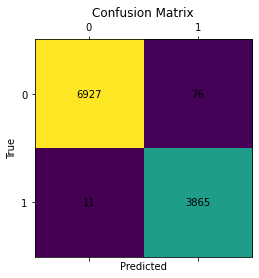

In [28]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(test_y, y_pred):
    """
    Given test_y and y_predictions, plot confusion matrix.
    """
    cm = confusion_matrix(test_y, y_pred)
    fig, ax = plt.subplots()
    ax.matshow(cm)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    for (i, j), z in np.ndenumerate(cm):
        ax.text(j, i, '{:d}'.format(z), ha='center', va='center')

    plt.show()
plot_confusion_matrix(test_y, prediction)

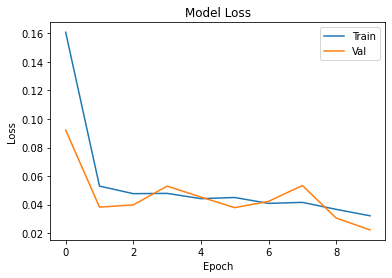

In [10]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show()

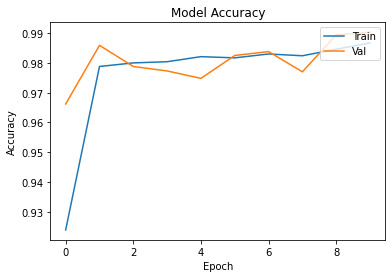

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show()